In [1]:
import numpy as np
import qutip as q
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
from math import factorial
import scipy.linalg as lin

In [2]:
sub_t = 350*u.um #substrate thickness (Si in this case)
metal_t = 250*u.nm #Deposited metal thickness (Al)
Sc = 67*u.fF/(u.um)**2 #JJ specific capacitance
epsilon = 11.45
W_jj = 200*u.nm #junction width
phi0 = c.h/2/c.e.si
T = 30*u.mK

In [3]:
def get_qubit_Es(Cq,Lj):
    Ec = (c.e.si**2/2/Cq).to(u.J)
    Ej = ((phi0/2/np.pi)**2/Lj).to(u.J)
    return (Ec, Ej)
    

In [92]:
(Ec1*u.eV/c.hbar).si

<Quantity 1.00832014e+09 1 / s>

In [132]:
C1 = 115*u.fF
# C2 = 115*u.fF
C2 = 80*u.fF
# Cg = 0*u.fF
Cg = 6*u.fF

C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
C_mat_inv = lin.inv(C_mat)
C_mat_inv /= u.fF
Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


Lj = 13*u.nH
Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value
Ej1 = Ej
Ej2 = Ej

# Ecg = 0*u.J
# Ecg = (c.e.si**2/2/Cg).to(u.J)

nz1 = 1j/2*(Ej1/2/Ec1)**(1/4)
nz2 = 1j/2*(Ej2/2/Ec2)**(1/4)

pz1 = (2*Ec1/Ej1)**(1/4)
pz2 = (2*Ec2/Ej2)**(1/4)


In [133]:
# print(Ej1, Ej2)
print(Ec1, Ec2)
print(nz1, nz2)
print(C_mat_inv)

1.0093326581377213 1.4201075771472593
1.250595701238484j 1.1482731285442764j
[[0.00829315 0.00057859]
 [0.00057859 0.01166827]] 1 / fF


In [134]:
N = 10
# I1 = q.Qobj([[1,0],[0,0]])
# I2 = q.Qobj([[0,0],[0,1]])
I = q.qeye(N)
# Id1 = np.array(q.tensor(I2, I))
# Id2 = np.array(q.tensor(I1, I))

In [135]:
qc1 = q.tensor(I, q.create(N))
qd1 = q.tensor(I, q.destroy(N))
qc2 = q.tensor(q.create(N),I)
qd2 = q.tensor(q.destroy(N),I)

In [136]:
qd1*qc1

Quantum object: dims = [[10, 10], [10, 10]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 8. 0. 0.]
 [0. 0. 0. ... 0. 9. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [137]:
qd2*qc2

Quantum object: dims = [[10, 10], [10, 10]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [138]:
n1 = nz1*(qc1-qd1)
n2 = nz2*(qc2-qd2)

phi1 = pz1*(qc1+qd1)
phi2 = pz2*(qc2+qd2)

In [139]:
4*Ec1*n1*n1

Quantum object: dims = [[10, 10], [10, 10]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[  6.31434315   0.          -8.92982972 ...   0.           0.
    0.        ]
 [  0.          18.94302946   0.         ...   0.           0.
    0.        ]
 [ -8.92982972   0.          31.57171577 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  94.7151473    0.
  -53.57897835]
 [  0.           0.           0.         ...   0.         107.3438336
    0.        ]
 [  0.           0.           0.         ... -53.57897835   0.
   56.82908838]]

In [140]:
H1 = (4*Ec1*n1*n1
      +1/2*Ej1*phi1*phi1
      -1/factorial(4)*Ej1*(phi1*phi1)*(phi1*phi1))
H2 = 4*Ec2*n2*n2+1/2*Ej2*phi2*phi2-1/factorial(4)*Ej2*(phi2*phi2)*(phi2*phi2)
H_int = 4*Ecg/2*(n1*n2+n2*n1)

In [141]:
H1

Quantum object: dims = [[10, 10], [10, 10]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[ 12.37635314   0.          -0.71370597 ...   0.           0.
    0.        ]
 [  0.          36.6243931    0.         ...   0.           0.
    0.        ]
 [ -0.71370597   0.          59.86310039 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 160.916647     0.
  -17.12894321]
 [  0.           0.           0.         ...   0.         185.66935329
    0.        ]
 [  0.           0.           0.         ... -17.12894321   0.
  100.78918537]]

In [142]:
H2

Quantum object: dims = [[10, 10], [10, 10]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[ 14.62462204   0.           0.         ...   0.           0.
    0.        ]
 [  0.          14.62462204   0.         ...   0.           0.
    0.        ]
 [  0.           0.          14.62462204 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 116.71046876   0.
    0.        ]
 [  0.           0.           0.         ...   0.         116.71046876
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  116.71046876]]

In [143]:
H_int

Quantum object: dims = [[10, 10], [10, 10]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [144]:
H_tot = H1+H2+H_int

In [145]:
h = np.array(H_tot)

In [146]:
eig, vec = lin.eigh(h)

In [147]:
eig  = eig**(1/2)

In [148]:
eig

array([ 5.19251501,  7.14663144,  7.44050516,  8.59955394,  8.91128812,
        9.05201146,  9.75466313, 10.11313442, 10.24536723, 10.3155126 ,
       10.43813245, 10.72776144, 10.88962759, 11.11249916, 11.28575961,
       11.33533997, 11.40700161, 11.71799839, 11.74646175, 11.94742167,
       11.97730034, 12.23823032, 12.30078967, 12.37110132, 12.38277631,
       12.49443303, 12.79863577, 12.87042913, 12.89466721, 13.03534572,
       13.0772037 , 13.16087597, 13.23194376, 13.43146647, 13.46739642,
       13.55604324, 13.67008347, 13.68387958, 13.8607639 , 13.92836733,
       13.96356256, 14.00358972, 14.16122299, 14.26310585, 14.37605731,
       14.37921872, 14.41841081, 14.48190851, 14.49401285, 14.57982187,
       14.6664546 , 14.73800719, 14.7559133 , 14.99451596, 15.15408141,
       15.20557868, 15.28130522, 15.31657455, 15.42530562, 15.43679709,
       15.44333504, 15.45735831, 15.48434448, 15.64429941, 15.66811514,
       15.91425138, 15.93091637, 16.00429948, 16.09309788, 16.11

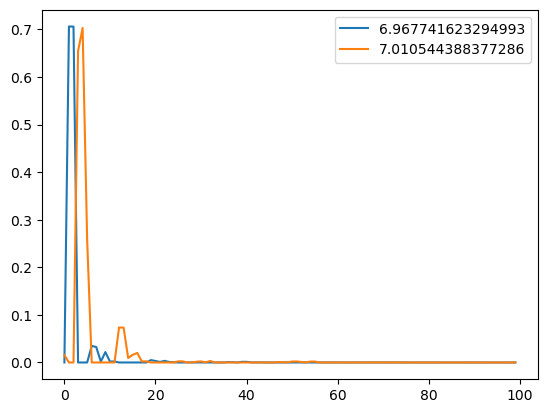

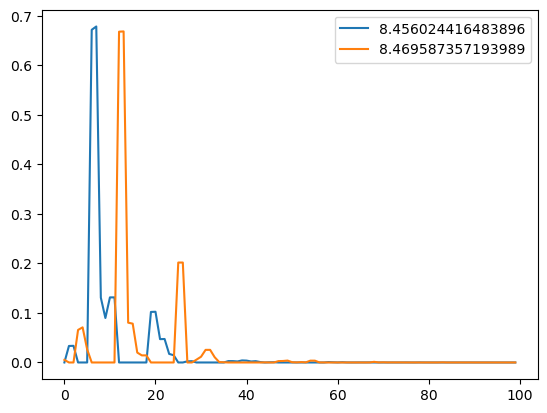

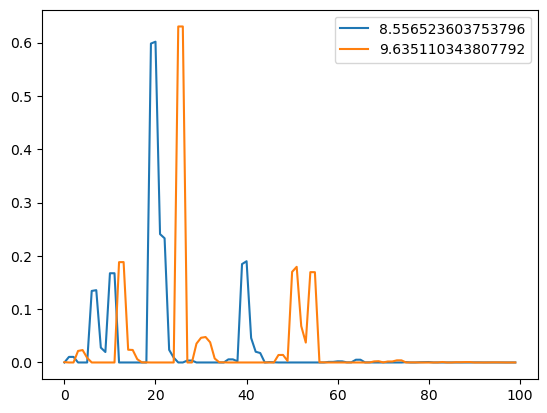

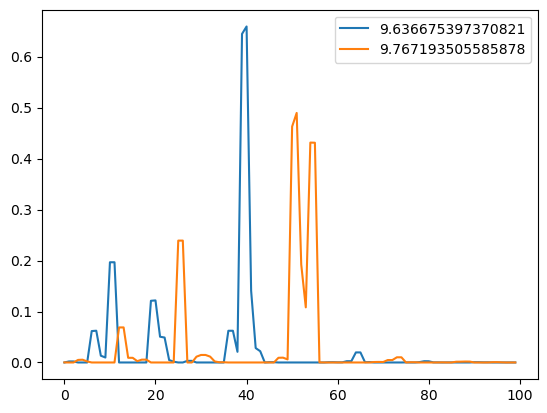

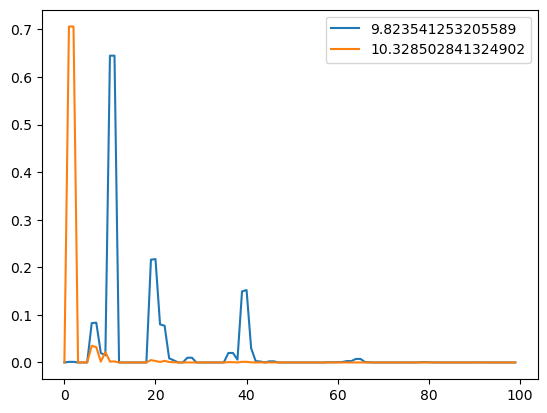

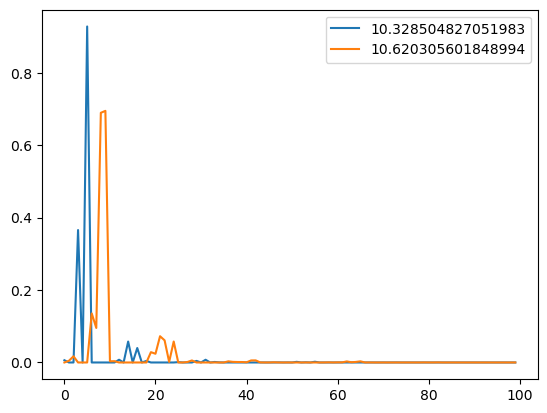

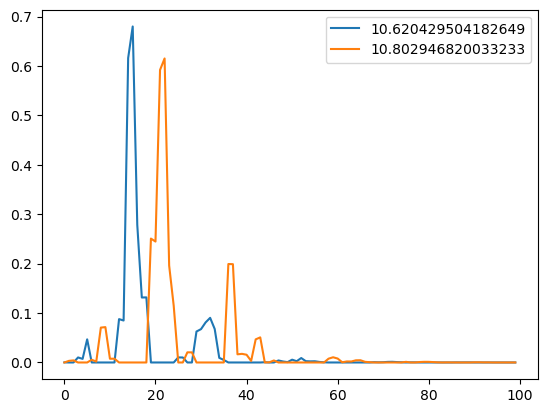

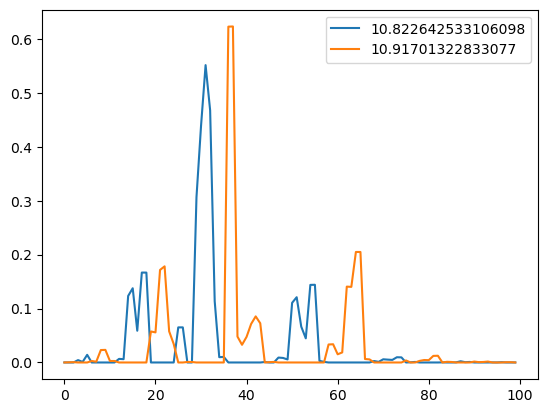

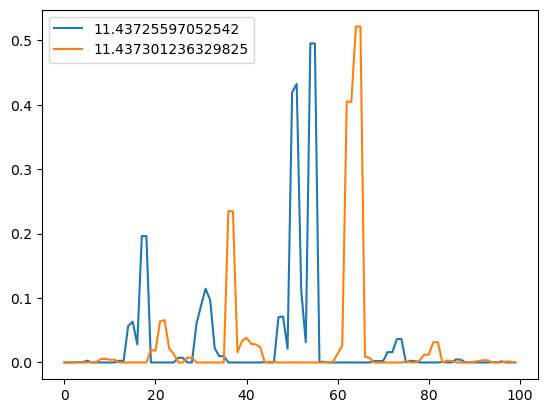

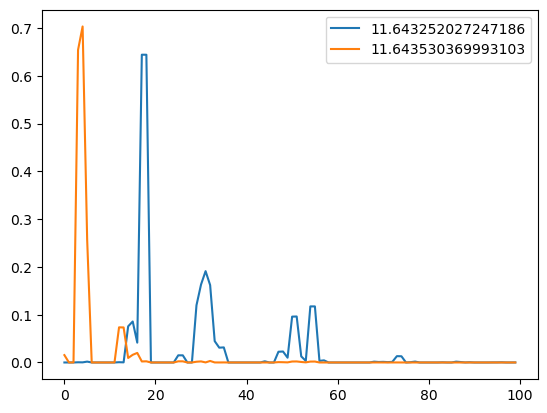

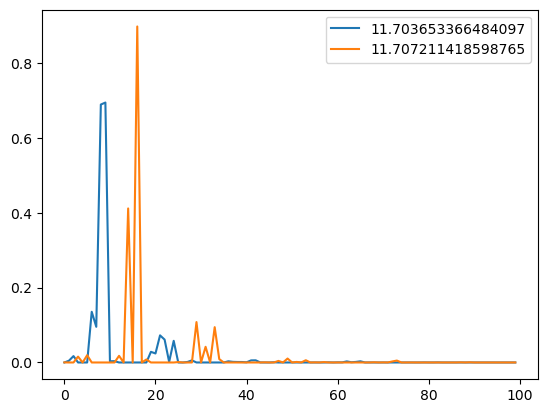

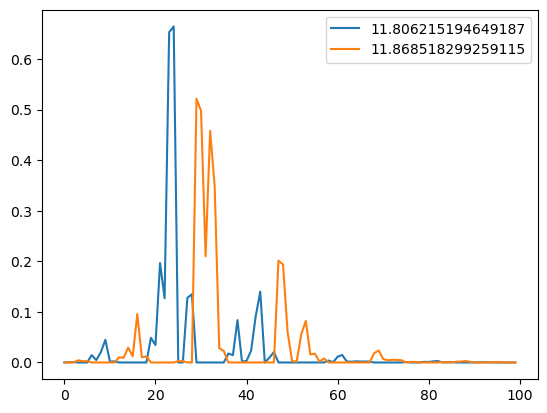

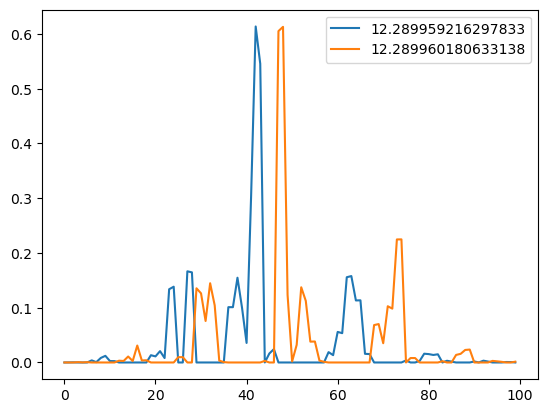

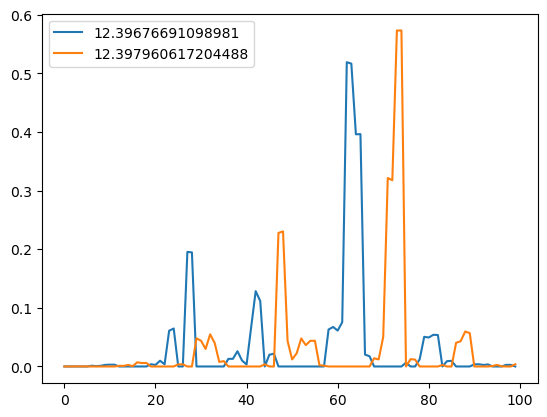

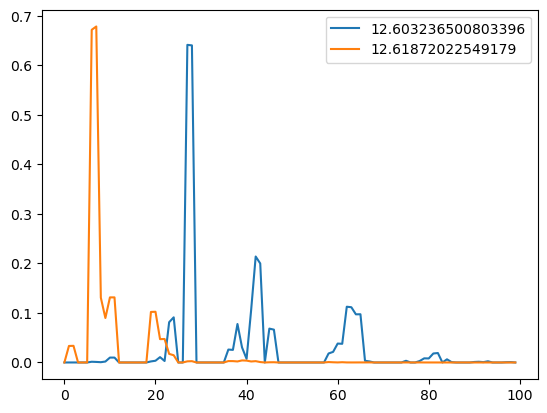

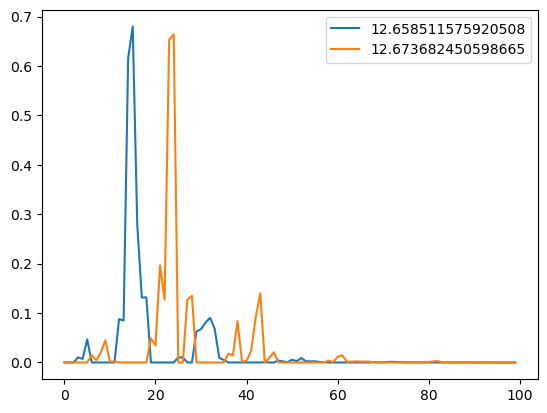

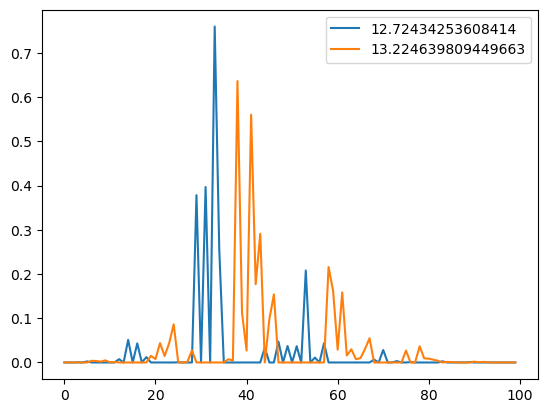

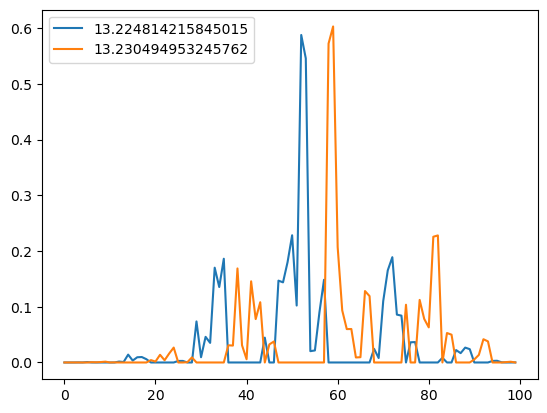

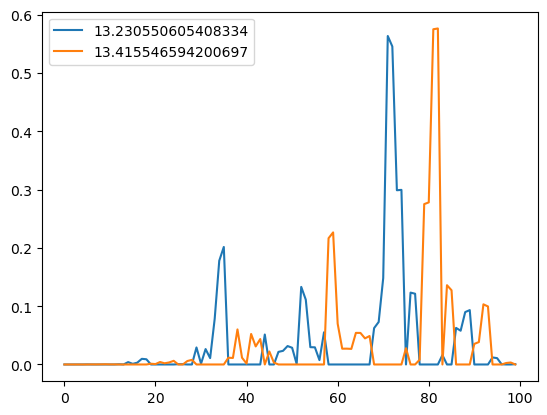

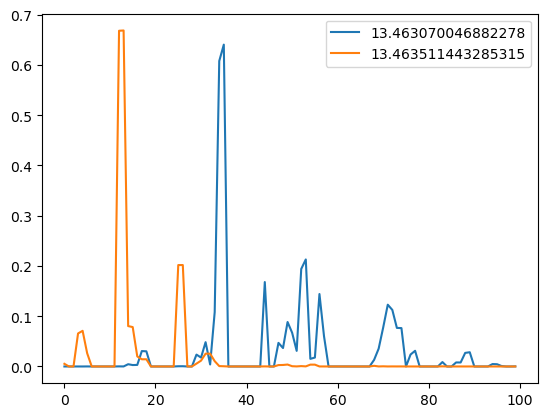

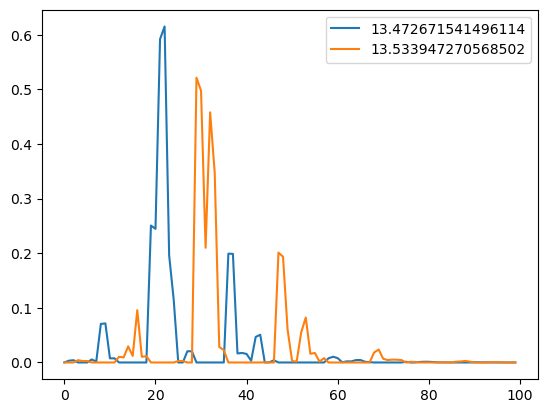

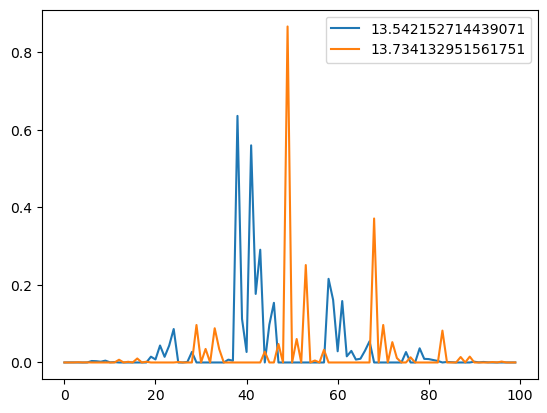

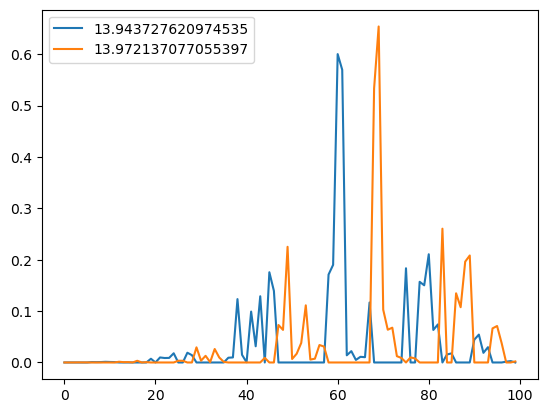

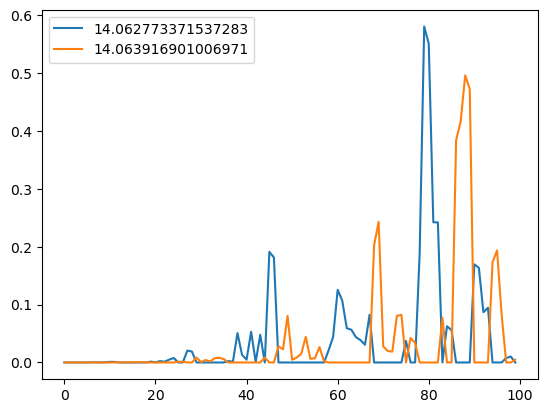

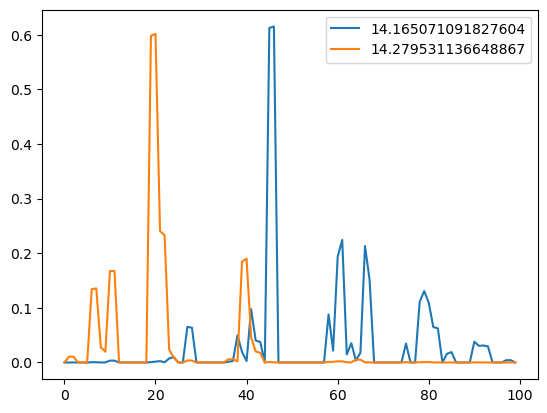

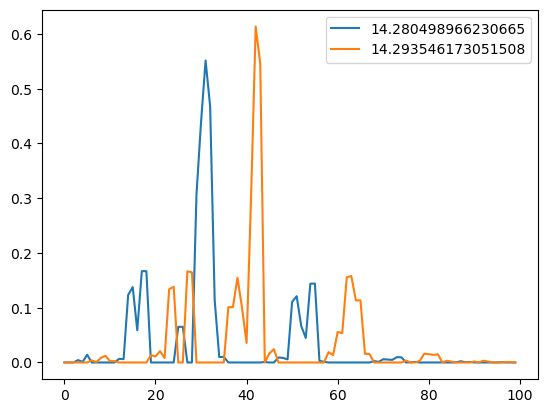

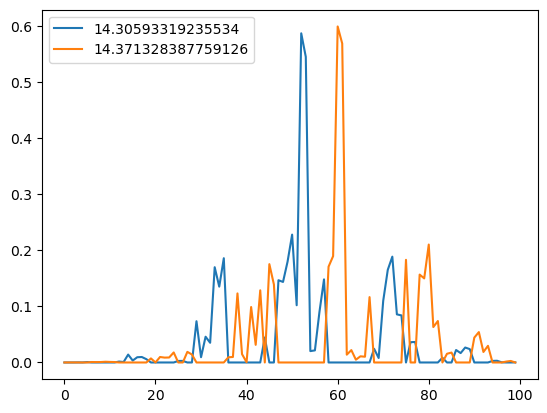

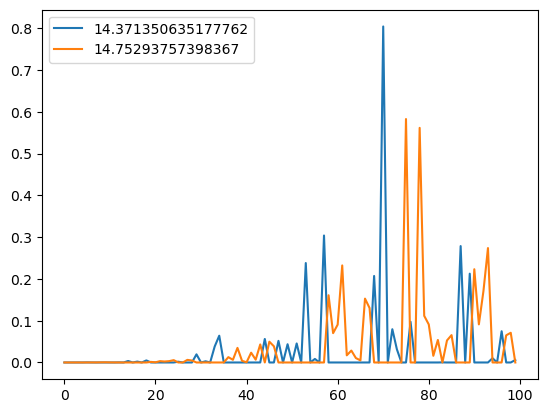

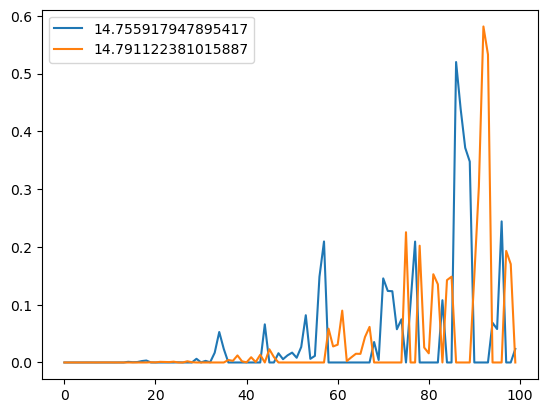

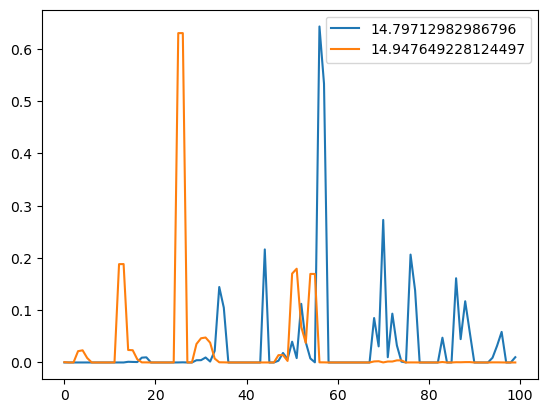

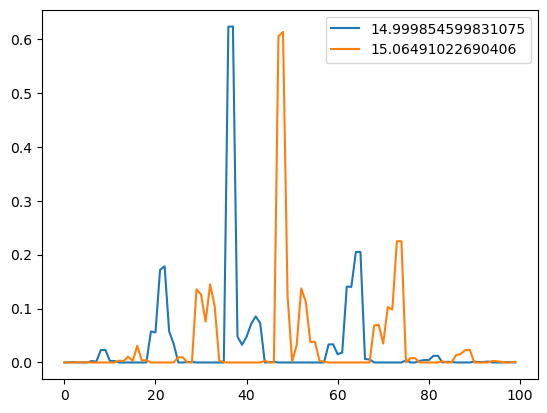

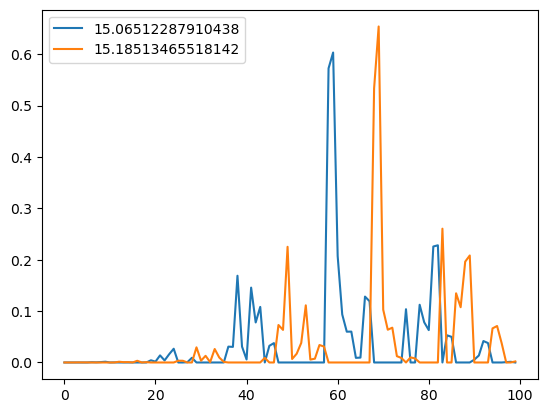

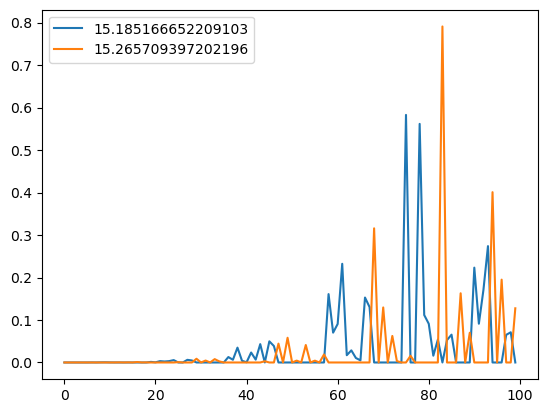

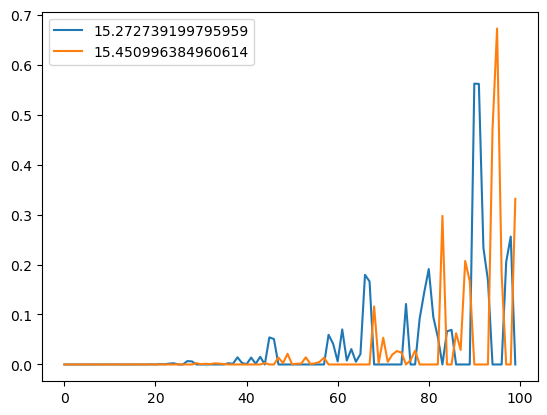

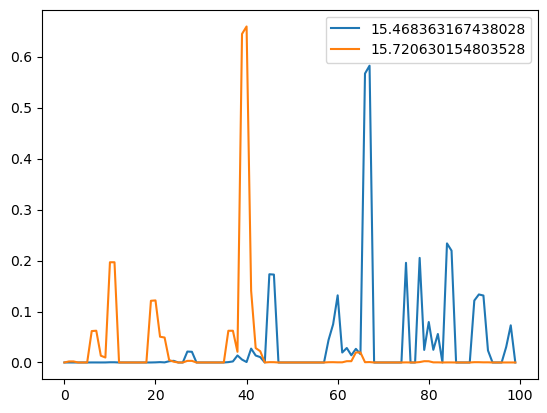

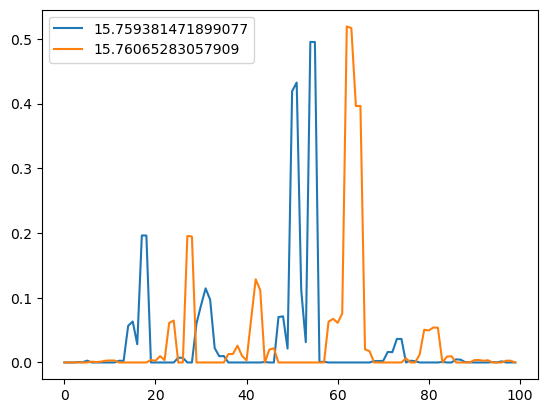

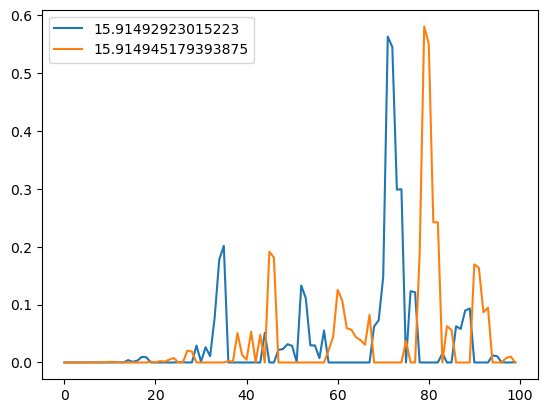

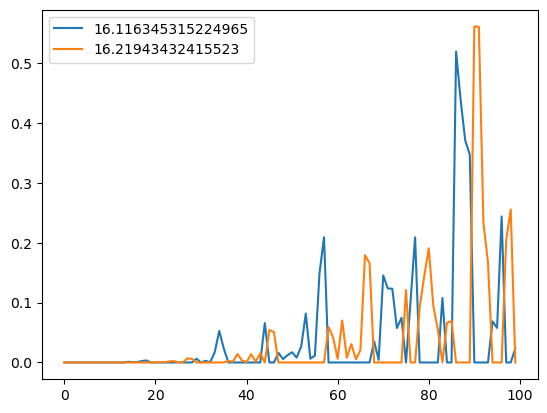

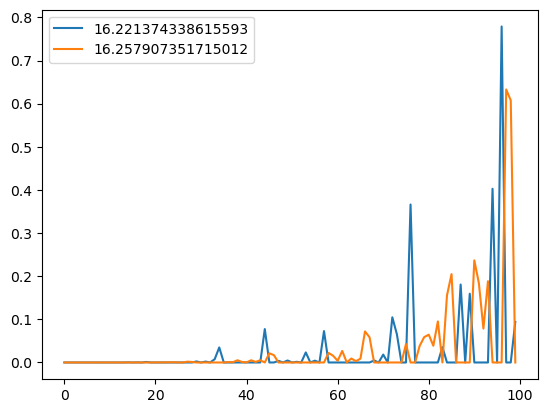

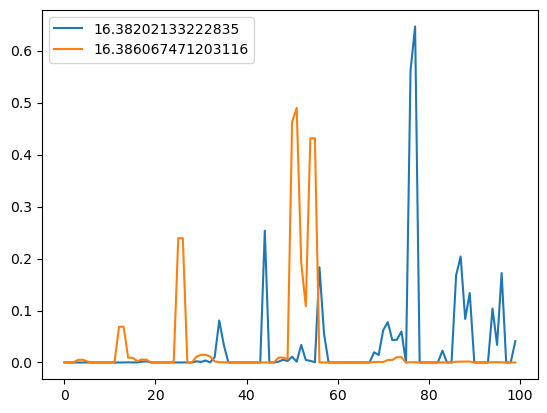

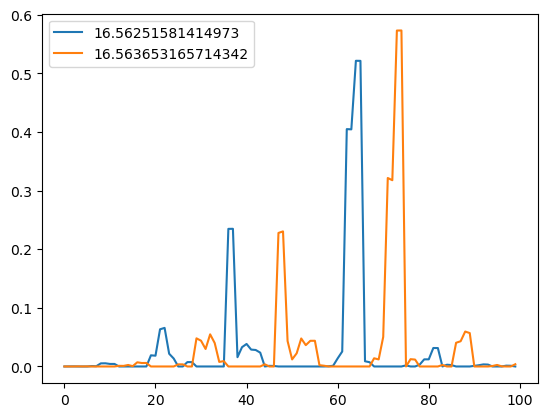

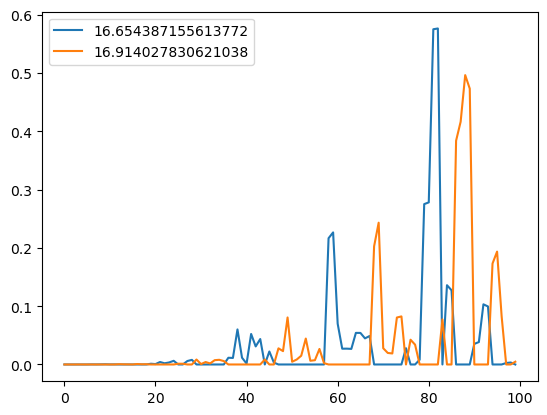

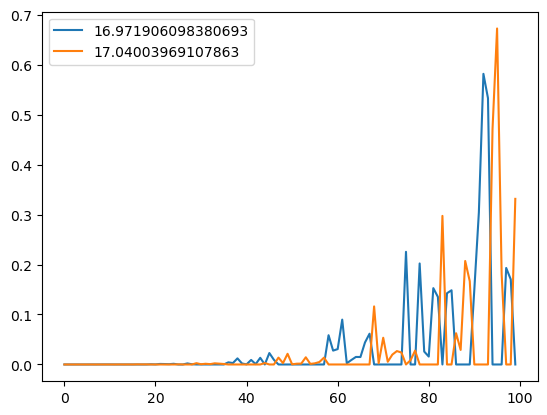

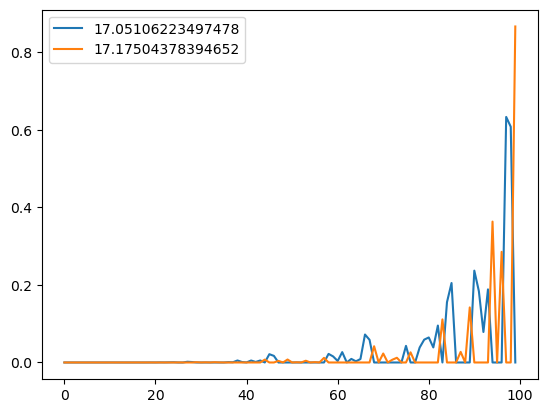

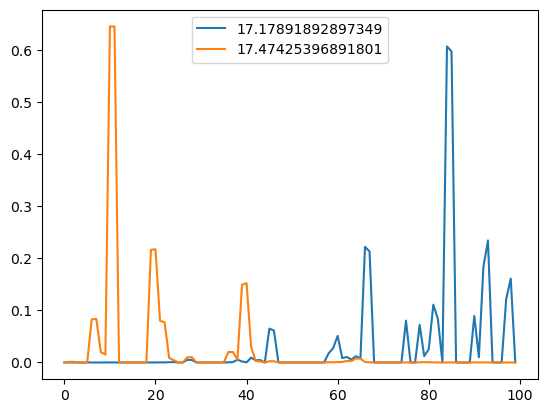

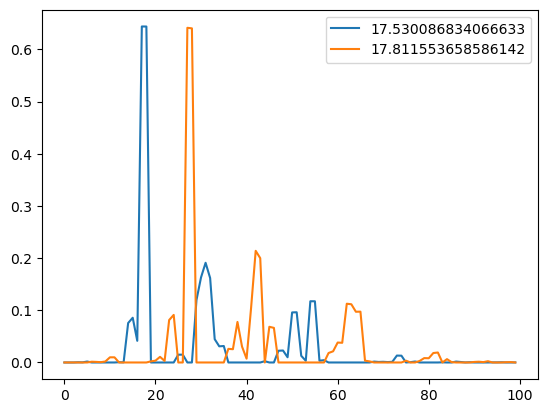

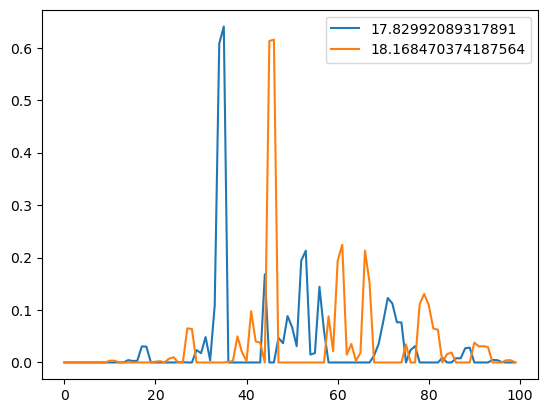

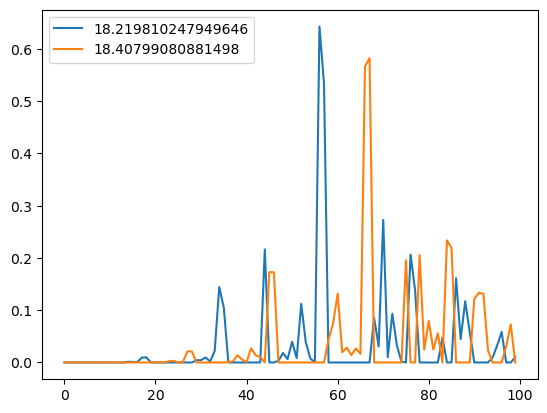

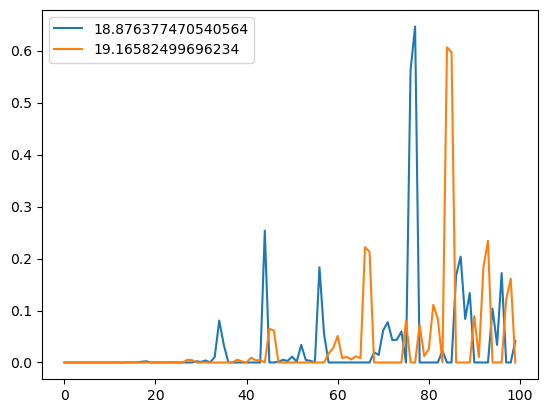

IndexError: index 100 is out of bounds for axis 0 with size 100

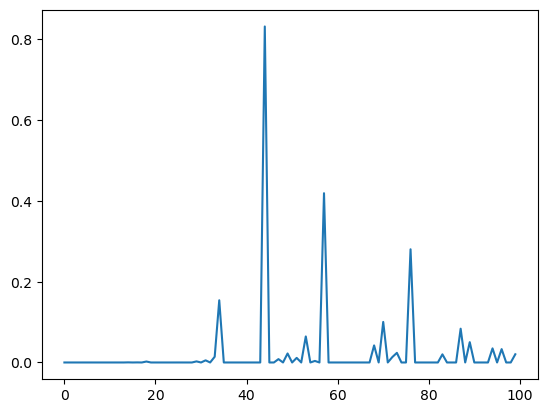

In [131]:
l = len(vec[0])
for i in range(int(len(vec)/2)):
    j = 2*i
    plt.plot(np.arange(l),np.absolute(vec[j+1]),label = '{}'.format(eig[j+1]))
    plt.plot(np.arange(l),np.absolute(vec[j+2]),label = '{}'.format(eig[j+2]))
    plt.legend()
    plt.show()

In [463]:
np.sqrt(8*Ec1*Ej1)-Ec1-eig[0]*2*u.J

<Quantity -5.27935002e-26 J>

In [513]:
f1 = eig[0]*2*u.J/c.h

In [514]:
f2 = eig[1]*2*u.J/c.h

In [515]:
f1-f2

<Quantity -4.76837158e-07 1 / s>

In [134]:
I1 = q.Qobj([[1,0],[0,0]])
I2 = q.Qobj([[0,0],[0,1]])

In [135]:
q.tensor(I1, q.create(N))

Quantum object: dims = [[2, 10], [2, 10]], shape = (20, 20), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.    

In [85]:
q.tensor( I2, q.create(N))

Quantum object: dims = [[2, 5], [2, 5]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.41421356 0.         0.         0.        ]
 [0.         0.         0.         0.        

In [77]:
q.identity(10)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

In [78]:
H = q.tensor(q.sigmaz(), 
             q.qeye(2)) + q.tensor(q.identity(2), q.sigmaz()) + 0.05 * q.tensor(q.sigmax(), q.sigmax())